In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from prettytable import PrettyTable

In [3]:
filepath = "D:\CYBER ATTACK DETECTION  PROJECT\CODE\FINAL DATASET\iot_final_combined-datasets.csv"

In [4]:
df = pd.read_csv(filepath, nrows=170000, dtype={'id_orig_h': str})

In [5]:
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0


In [6]:
del df['Unnamed: 0']

In [7]:
df.shape

(10000, 27)

In [8]:
df['label'].value_counts()

PartOfAHorizontalPortScan    5538
Benign                       4462
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

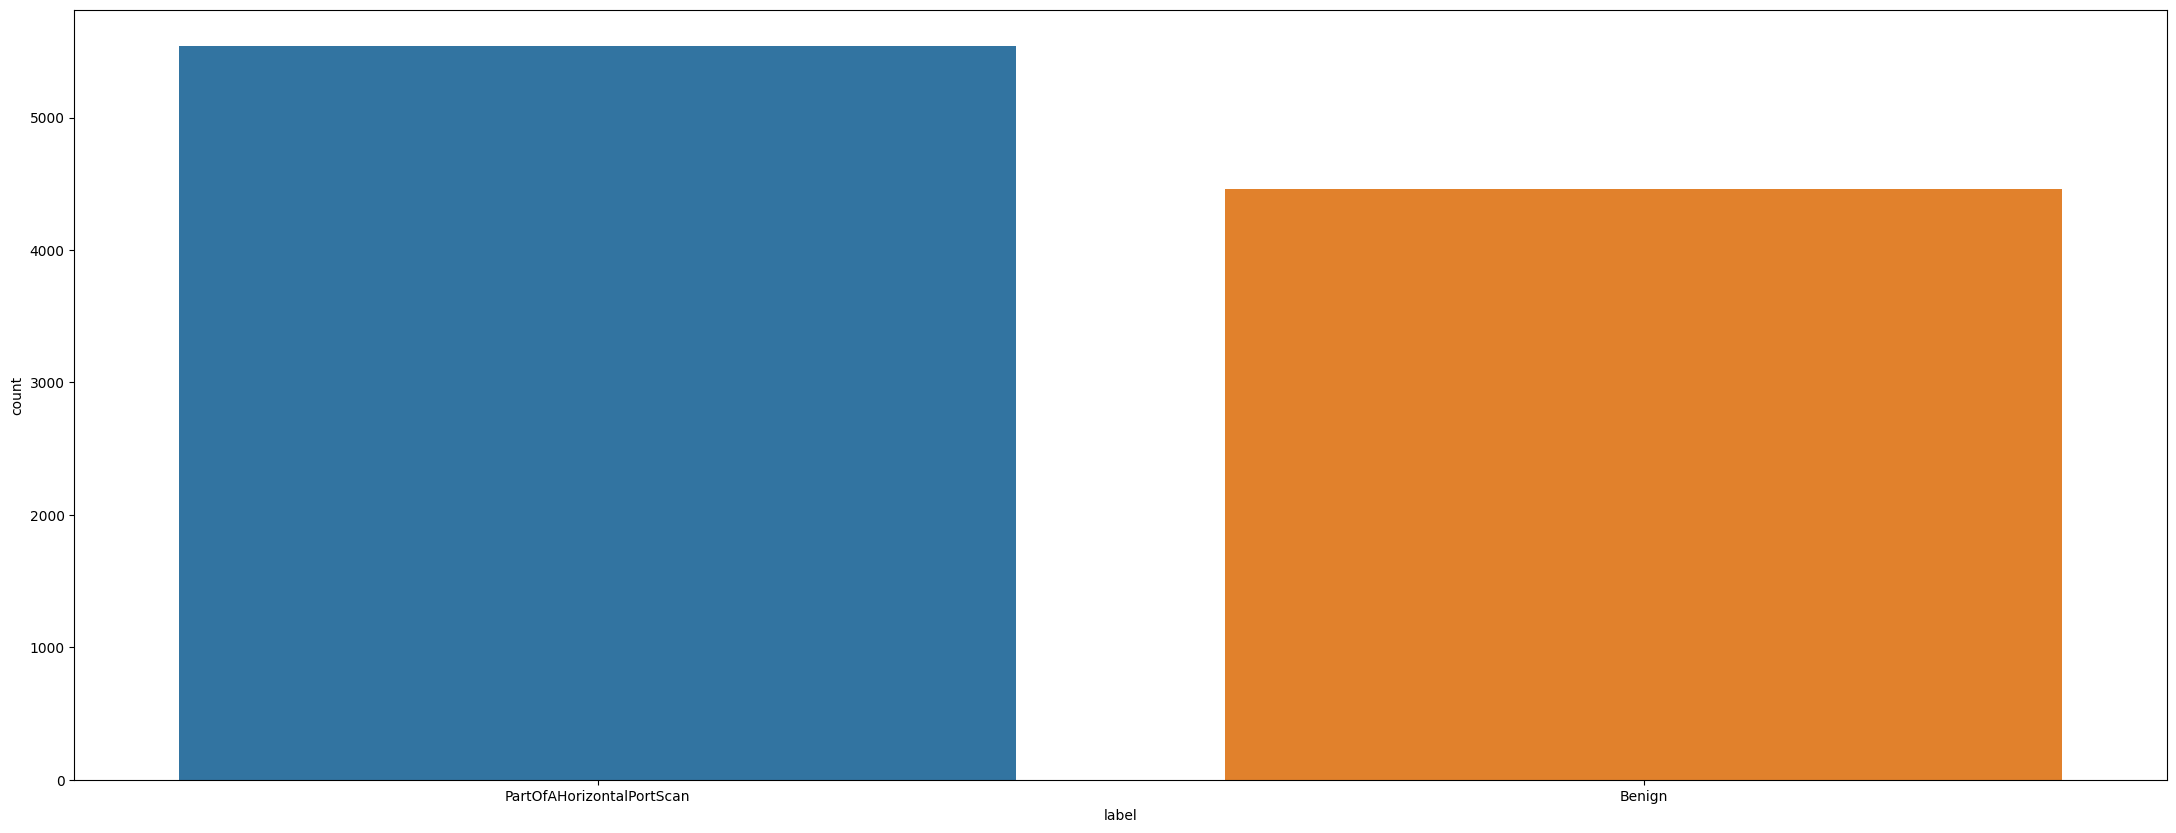

In [9]:
plt.figure(figsize = (27,10))
sns.countplot(x = df['label'])

In [10]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'id_orig_h','misses_bytes','proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']

In [11]:
for col in df.columns: 
    print(col) 

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
id_orig_h
misses_bytes
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [12]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'id_orig_h', 'misses_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']


In [13]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [14]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)

In [17]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)
xgb_f1 = f1_score(Y_test, xgb_pred)
xgb_recall = recall_score(Y_test, xgb_pred)
xgb_precision = precision_score(Y_test, xgb_pred)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)

# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred)
dt_recall = recall_score(Y_test, dt_pred)
dt_precision = precision_score(Y_test, dt_pred)

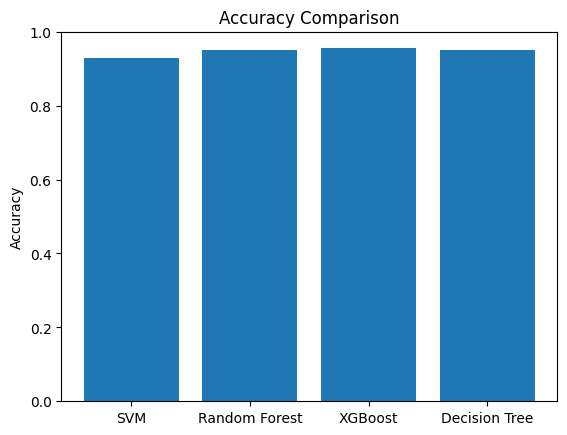

In [19]:
labels = ['SVM', 'Random Forest', 'XGBoost','Decision Tree']
accuracies = [svm_acc, rf_acc,xgb_acc,dt_acc]
plt.bar(labels, accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [20]:
svm = SVC(kernel='linear')

# Fit the SVM model on the training data
svm.fit(X_train, Y_train)

# Make predictions on the test data
svm_pred = svm.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the SVM model
svm_acc = accuracy_score(Y_test, svm_pred)
svm_f1 = f1_score(Y_test, svm_pred, average='macro')
svm_recall = recall_score(Y_test, svm_pred, average='macro')
svm_precision = precision_score(Y_test, svm_pred, average='macro')

In [21]:
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred, average='macro')
rf_recall = recall_score(Y_test, rf_pred, average='macro')
rf_precision = precision_score(Y_test, rf_pred, average='macro')

In [22]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)
xgb_f1 = f1_score(Y_test, xgb_pred)
xgb_recall = recall_score(Y_test, xgb_pred)
xgb_precision = precision_score(Y_test, xgb_pred)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)

# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred)
dt_recall = recall_score(Y_test, dt_pred)
dt_precision = precision_score(Y_test, dt_pred)

In [24]:
print("SVM Accuracy:", svm_acc)
print("SVM F1 Score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM Precision:", svm_precision)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest Precision:", rf_precision)

print("XGBoost Accuracy:", xgb_acc)
print("XGBoost F1 Score:", xgb_f1)
print("XGBoost Recall:", xgb_recall)
print("XGBoost Precision:", xgb_precision)

print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree F1 Score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree Precision:", dt_precision)

SVM Accuracy: 0.955
SVM F1 Score: 0.9540471211031958
SVM Recall: 0.9500554938956715
SVM Precision: 0.9621530698065601
Random Forest Accuracy: 0.95
Random Forest F1 Score: 0.9490149172155211
Random Forest Recall: 0.9455059033588198
Random Forest Precision: 0.9557419270857547
XGBoost Accuracy: 0.9545
XGBoost F1 Score: 0.9602098819414079
XGBoost Recall: 0.9990900818926297
XGBoost Precision: 0.9242424242424242
Decision Tree Accuracy: 0.9495
Decision Tree F1 Score: 0.9556433904259992
Decision Tree Recall: 0.9899909008189263
Decision Tree Precision: 0.9235993208828522


In [25]:
# create table
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "F1 Score", "Recall", "Precision"]
table.add_row(["SVM", svm_acc, svm_f1, svm_recall, svm_precision])
table.add_row(["Random Forest", rf_acc, rf_f1, rf_recall, rf_precision])
table.add_row(["XGBoost", xgb_acc, xgb_f1, xgb_recall, xgb_precision])
table.add_row(["Decision Tree", dt_acc, dt_f1, dt_recall, dt_precision])

# print table
print(table)

+---------------+----------+--------------------+--------------------+--------------------+
|   Algorithm   | Accuracy |      F1 Score      |       Recall       |     Precision      |
+---------------+----------+--------------------+--------------------+--------------------+
|      SVM      |  0.955   | 0.9540471211031958 | 0.9500554938956715 | 0.9621530698065601 |
| Random Forest |   0.95   | 0.9490149172155211 | 0.9455059033588198 | 0.9557419270857547 |
|    XGBoost    |  0.9545  | 0.9602098819414079 | 0.9990900818926297 | 0.9242424242424242 |
| Decision Tree |  0.9495  | 0.9556433904259992 | 0.9899909008189263 | 0.9235993208828522 |
+---------------+----------+--------------------+--------------------+--------------------+


In [26]:
# Create comparison graph
algorithms = ['SVM', 'Random Forest','XGBoost', 'Decision Tree']
accuracy_scores = [svm_acc, rf_acc,xgb_acc, dt_acc]
f1_scores = [svm_f1, rf_f1,xgb_f1, dt_f1]
recall_scores = [svm_recall, rf_recall,xgb_recall, dt_recall]
precision_scores = [svm_precision, rf_precision,xgb_precision, dt_precision]

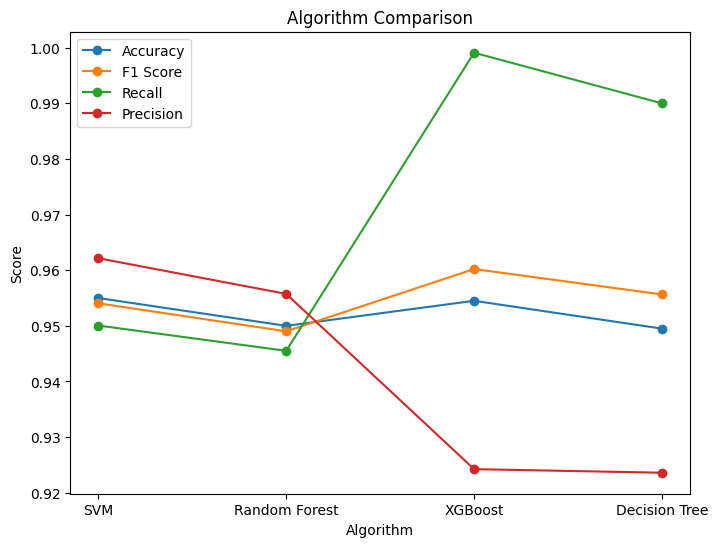

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

In [28]:
models = ['SVM', 'Random Forest', 'XGBoost', 'Decision Tree']
accuracy = [svm_acc, rf_acc, xgb_acc, dt_acc]
f1 = [svm_f1, rf_f1, xgb_f1, dt_f1]
recall = [svm_recall, rf_recall, xgb_recall, dt_recall]
precision = [svm_precision, rf_precision, xgb_precision, dt_precision]

In [29]:
x = np.arange(len(models))
width = 0.2

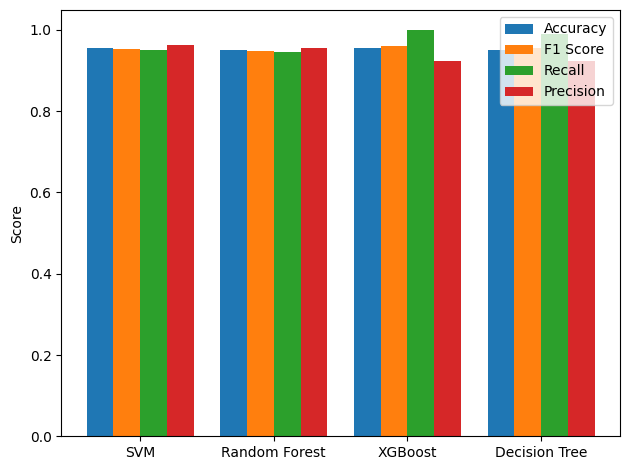

In [30]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, precision, width, label='Precision')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()